In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
from mypy.progress_bar import log_progress

In [2]:
import cv2
from IPython.display import HTML, FileLink
from os import listdir
from os.path import isfile, join, isdir

# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# For downloading files
from IPython.display import FileLink, FileLinks

In [7]:
PATH = "data/btc/"
SOURCE = f'{PATH}btcgraphs/'
DESTINATION = f'{PATH}btcgraphs_cropped/'

In [8]:
all_files = []
new_files = []



for fld in ['1', '1.5']:
    for st in ['train', 'test', 'valid']:
        if fld == '1.5' and st == 'test':
            continue
        for cls in ['UP', 'DOWN']:
            new_dir = join(DESTINATION, st, cls)
            current_dir = join(SOURCE, fld, st, cls)
            for f in listdir(current_dir):
                if isfile(join(current_dir, f)):
                    all_files.append(join(current_dir, f))
                    new_files.append(join(new_dir, f))

In [9]:
print(all_files[0:3])

['data/btc/btcgraphs/1/train/UP/1a18e7f7-f874-4565-aded-e1d46b7a9474.png', 'data/btc/btcgraphs/1/train/UP/6ea4e7f2-e509-431c-b72b-2c862cfb4dfe.png', 'data/btc/btcgraphs/1/train/UP/0a9c0cc6-65b9-47d9-b2b0-9f82cc091e3e.png']


In [10]:
print(new_files[0:3])

['data/btc/btcgraphs_cropped/train/UP/1a18e7f7-f874-4565-aded-e1d46b7a9474.png', 'data/btc/btcgraphs_cropped/train/UP/6ea4e7f2-e509-431c-b72b-2c862cfb4dfe.png', 'data/btc/btcgraphs_cropped/train/UP/0a9c0cc6-65b9-47d9-b2b0-9f82cc091e3e.png']


In [11]:
FileLink(all_files[0])

/home/liam/crypto-project/fast-crypto-ai/data/btc/btcgraphs/1/train/UP/1a18e7f7-f874-4565-aded-e1d46b7a9474.png

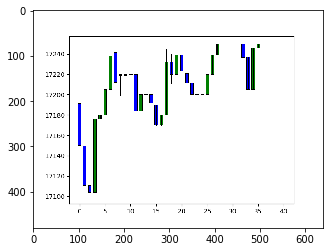

In [12]:
img = cv2.imread(all_files[0])
plt.imshow(img)

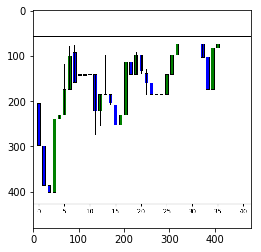

In [13]:
crop_img = img[0:480, 90:90+480]
plt.imshow(crop_img)

In [ ]:
i = 0
for f in log_progress(all_files, every=10):
    img = cv2.imread(f)
    crop_img = img[0:480, 90:90+480]
    cv2.imwrite(new_files[i], crop_img)
    i += 1

    

    

VBox(children=(HTML(value=''), IntProgress(value=0, max=1008310)))